In [2]:
!pip install transformers[torch] -q
!pip install umap-learn numpy matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
import warnings
# To ignore all warnings (not recommended unless you're sure about the consequences)
warnings.filterwarnings("ignore")

In [4]:
import torch
import pandas as pd
import numpy as np
import os
from transformers import AutoTokenizer,AutoModelForMaskedLM
from transformers import pipeline

In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [6]:
model1=AutoModelForMaskedLM.from_pretrained('sampathlonka/San-BERT')
model1

config.json:   0%|          | 0.00/870 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [7]:
model1.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [8]:
tokenizer1=AutoTokenizer.from_pretrained('sampathlonka/San-BERT')
tokenizer1

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/472k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/951k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='sampathlonka/San-BERT', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [9]:
import re

In [11]:
#df.to_csv('cleaned.csv')
data = pd.read_excel('/content/manipulated_data.xlsx')

In [12]:
embedding=[]

In [13]:
df=data

In [14]:
for i in range(len(df)):
    with torch.no_grad():
        t = tokenizer1.encode(df.Text[i][0],max_length=512, padding=True, truncation=True, return_tensors="pt")
        model_output = model1.bert(t).last_hidden_state
        model_output = model_output.squeeze()
        out = torch.mean(model_output,dim=0)
        out_numpy = out.numpy()
        embedding.append(out_numpy)

In [15]:
embedding[500].shape

(768,)

In [16]:
data= np.array(embedding)
data

array([[-0.96271306, -1.3908592 , -0.5929441 , ...,  0.02827228,
        -0.8196438 , -0.35851505],
       [-0.9627138 , -1.3908588 , -0.59294325, ...,  0.02827181,
        -0.8196443 , -0.35851502],
       [-0.96271414, -1.39086   , -0.5929442 , ...,  0.02827181,
        -0.8196443 , -0.3585155 ],
       ...,
       [-0.962714  , -1.3908595 , -0.59294385, ...,  0.02827162,
        -0.81964403, -0.35851547],
       [-0.96271354, -1.3908578 , -0.5929436 , ...,  0.02827252,
        -0.819644  , -0.3585156 ],
       [-0.96271396, -1.390859  , -0.5929436 , ...,  0.02827217,
        -0.81964403, -0.3585154 ]], dtype=float32)

In [17]:
data.shape

(1031, 768)

## t-SNE Visualization

In [18]:
data

array([[-0.96271306, -1.3908592 , -0.5929441 , ...,  0.02827228,
        -0.8196438 , -0.35851505],
       [-0.9627138 , -1.3908588 , -0.59294325, ...,  0.02827181,
        -0.8196443 , -0.35851502],
       [-0.96271414, -1.39086   , -0.5929442 , ...,  0.02827181,
        -0.8196443 , -0.3585155 ],
       ...,
       [-0.962714  , -1.3908595 , -0.59294385, ...,  0.02827162,
        -0.81964403, -0.35851547],
       [-0.96271354, -1.3908578 , -0.5929436 , ...,  0.02827252,
        -0.819644  , -0.3585156 ],
       [-0.96271396, -1.390859  , -0.5929436 , ...,  0.02827217,
        -0.81964403, -0.3585154 ]], dtype=float32)

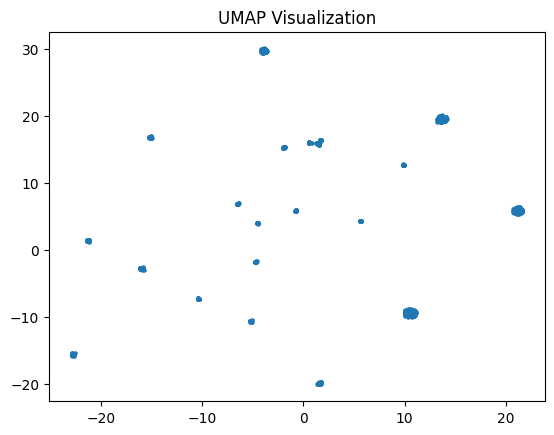

In [46]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the embeddings list to a numpy array
embeddings_np = np.array(embedding)

# Perform dimensionality reduction using UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embeddings_umap = reducer.fit_transform(embeddings_np)

# Visualize the UMAP embeddings
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=5)
plt.title('UMAP Visualization')
plt.show()

# Perform clustering using K-means
n_clusters = 5  # You can choose the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap)

# Add the cluster labels to your dataframe
df['cluster'] = clusters

# Now df contains the cluster labels for each data point
#print(df.head())

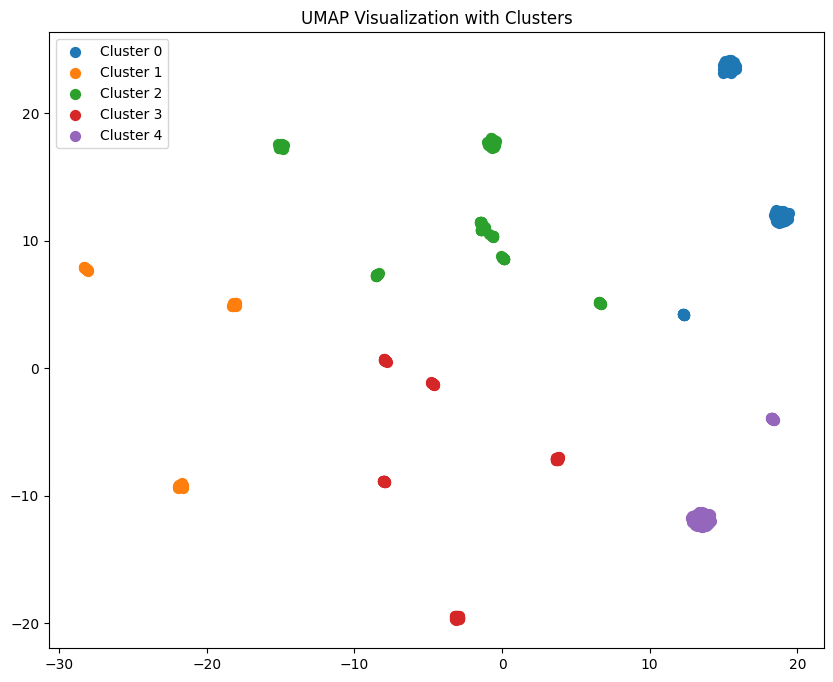

In [45]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the embeddings list to a numpy array
embeddings_np = np.array(embedding)

# Perform dimensionality reduction using UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embeddings_umap = reducer.fit_transform(embeddings_np)

# Perform clustering using K-means
n_clusters = 5  # You can choose the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap)

# Add the cluster labels to your dataframe
df['cluster'] = clusters

# Plotting with colored clusters
plt.figure(figsize=(10, 8))
for cluster_label in range(n_clusters):
    plt.scatter(
        embeddings_umap[clusters == cluster_label, 0],
        embeddings_umap[clusters == cluster_label, 1],
        s=50,
        label=f'Cluster {cluster_label}',
    )

plt.title('UMAP Visualization with Clusters')
plt.legend()
plt.show()

# Now df contains the cluster labels for each data point
#print(df.head())

In [50]:
# Let's say you want to see data points belonging to cluster 0
cluster_label_to_view0 = 0
cluster_data0 = df[df['cluster'] == cluster_label_to_view0]

# Let's say you want to see data points belonging to cluster 1
cluster_label_to_view1 = 1
cluster_data1 = df[df['cluster'] == cluster_label_to_view1]

# Let's say you want to see data points belonging to cluster 2
cluster_label_to_view2 = 2
cluster_data2 = df[df['cluster'] == cluster_label_to_view2]

# Let's say you want to see data points belonging to cluster 3
cluster_label_to_view3 = 3
cluster_data3 = df[df['cluster'] == cluster_label_to_view3]

# Let's say you want to see data points belonging to cluster 4
cluster_label_to_view4 = 4
cluster_data4 = df[df['cluster'] == cluster_label_to_view4]

In [51]:
cluster_data0

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
5,यथाविधिहुताग्नीनांयथाकामार्चितार्थिनाम्।यथापरा...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,शैशवेऽभ्यस्तविद्यानांयौवनेविषयैषिणाम्।वार्धकेम...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,आकारसदृशप्रज्ञःप्रज्ञयासदृशागमः।आगमैःसदृशारम्भ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,भीमकान्तैर्नृपगुणैःसबभूवोपजीविनाम्।अधृष्यश्चाभ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,जुगोपात्मानमत्रस्तःभेजेधर्ममनातुरः।अगृध्नुरादद...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,गरुडापातविश्लिष्टमेघनादास्त्रबन्धनः।दाशरथ्योःक...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,भुजमूर्धोरुबाहुल्यादेकोऽपिधनदानुजः।ददृशेह्ययथा...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1014,जेतारम्लोकपालानाम्स्वमुखैरर्चितेश्वरम्।रामस्तु...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1025,बालार्कप्रतिमेवाप्सुवीचिभिन्नापतिष्यतः।रराजरक्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
cluster_data1

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
0,वागर्थाविवसंपृक्तौवागर्थप्रतिपत्तये।जगतःपितरौव...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,मन्दःकवियशःप्रार्थीगमिष्याम्यपहास्यताम्।प्रांश...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,त्यागायसंभृतार्थानांसत्यायमितभाषिणाम्।यशसेविजि...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,तंसन्तःश्रोतुमर्हन्तिसदसद्व्यक्तिहेतवः। हेम्नः...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,वैवस्वतोमनुर्नाममाननीयोमनीषिणाम्।आसीन्महीक्षित...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,वचसैवतयोर्वाक्यमस्त्रमस्त्रेणनिघ्नतोः।अन्योन्य...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1018,विक्रमव्यतिहारेणसामान्याऽभूद्द्वयोरपि।जयश्रीरन...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1023,तद्व्योम्निशतधाभिन्नम्ददृशेदीप्तिमन्मुखम्।वपुर...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1024,तेनमन्त्रप्रयुक्तेननिमेषार्धादपातयत्।सरावणशिरः...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
cluster_data2

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
3,अथवाकृतवाग्द्वारेवंशेऽस्मिन्पूर्वसूरिभिः।मणौवज...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,सोऽहमाजन्मशुद्धानामाफलोदयकर्मणाम्।आसमुद्रक्षित...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
13,सर्वातिरिक्तसारेणसर्वतेजोभिभाविना।स्थितःसर्वोन...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
18,सेनापरिच्छदस्तस्यद्वयमेवार्थसाधनम्।शास्त्रेष्व...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
22,अनाकृष्टस्यविषयैर्विद्यानाम्प्रारदृश्वनः।तस्यध...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,अकालेबोधितोभ्राताप्रियस्वप्नोवृथाभवान्।रामेषुभ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1012,अन्योन्यदर्शनप्राप्तविक्रमावसरम्चिरात्।रामरावण...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1020,अयःशङ्कुचिताम्रक्षःशतघ्नीमथशत्रवे।हृताम्वैवस्व...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1022,अमोघम्संदधेचास्मैधनुष्येकधनुर्धरः।ब्राह्ममस्त्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2


In [54]:
cluster_data3

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
1,क्वसूर्यप्रभवोवंशःक्वचाल्पविषयामतिः।तितीर्षुर्...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,रघूणामन्वयंवक्ष्येतनुवाग्विभवोऽपिसन्।तद्गुणैःक...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
16,रेखामात्रमपिक्षुण्णादामनोर्वर्त्मनःपरम्।नव्यती...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
26,नकिलानुनयुस्तस्यराजानोरक्षितुर्यशः।व्यावृत्ताय...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
31,कलत्रवन्तमात्मानमवरोधेमहत्यपि।तयामेनेमनस्विन्य...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,रामम्पदातिमालोक्यलङ्केशम्चवरूथिनम्।हरियुग्यम्र...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
1016,रावणस्यापिरामास्तोभित्त्वाहृदयमाशुगः।विवेशभुवम...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1019,कृतप्रतिकृतप्रीतैस्तयोर्मुक्ताम्सुरासुरैः।परस्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1021,राघवोरथमप्राप्ताम्तामाशाम्चसुरद्विषाम्।अर्धचन्...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3


In [55]:
cluster_data4

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
17,प्रजानामेवभूत्यर्थंसताभ्योबलिमग्रहीत्।सहस्रगुण...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
23,प्रजानांविनयाधानाद्रक्षणाद्भरणादपि।सपितापितरस्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
39,परस्पराक्षिसादृश्यमदूरोज्झितवर्त्मसु।मृगद्वन्द...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
41,पवनस्यानुकूलत्वात्प्रार्थनासिद्धिशंसिनः।रजोभिस...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
62,पुरुषायुष्यजीविन्योनिरातङ्कानिरीतयः।यन्मदीयाःप...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,प्रवृत्तावुपलब्धायाम्तस्याःसंपातिदर्शनात्।मारु...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
989,प्रत्यभिज्ञानरत्नम्चरामायादर्शयत्कृती।हृदयम्स्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
998,पादपाविद्धपरिघःशिलानिष्पिष्टमुद्गरः।अतिशस्त्रन...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1007,इतराण्यपिरक्षांसिपेतुर्वानरकोटिषु।रजांसिसमरोत्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Create a t-SNE object
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)

# Apply t-SNE to the scaled data
tsne_result = tsne.fit_transform(data)

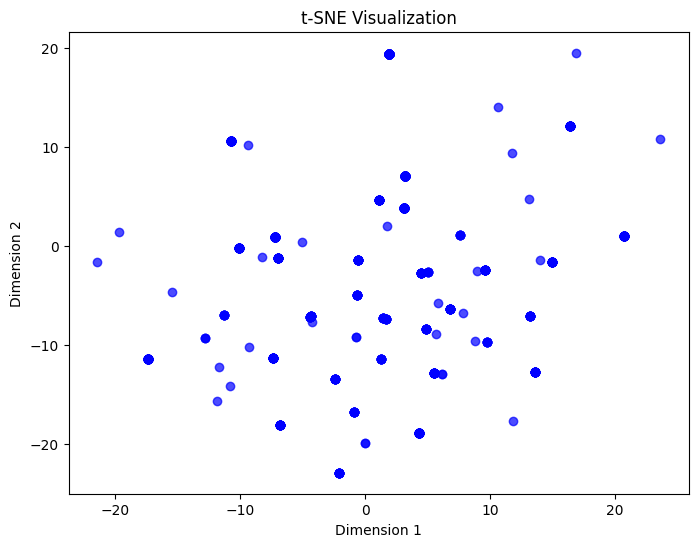

In [22]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', c='b', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()